In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("./train.csv")

## Quick data exploration and Visualization

In [4]:
df.head() # display first five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### print the number of non-nan values for each feature(column)
There are many missing values. Missing value of a particular feature will be 614-(count of that feature)

In [5]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

### a brief description of dataset

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Heatmap
### Correlation among various numerical features in the dataframe
LoanAmount and ApplicantIncome are a bit(score=0.57) correlated, no other pair is correlated as such.

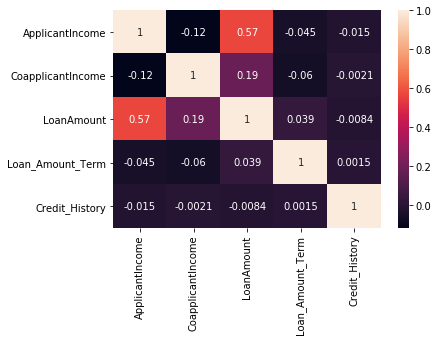

In [35]:
sb.heatmap(df.corr(),annot=True)
plt.show()

### Maximum applicants are from semiurban areas

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


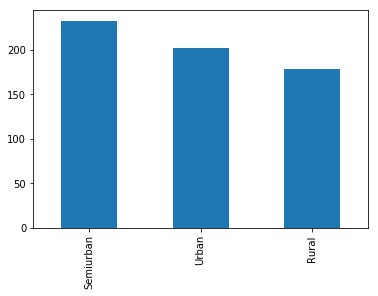

In [8]:
prop_area = df['Property_Area'].value_counts()
print(prop_area)
prop_area.plot(kind="bar")

### 81% applicants are Male

Male      489
Female    112
Name: Gender, dtype: int64


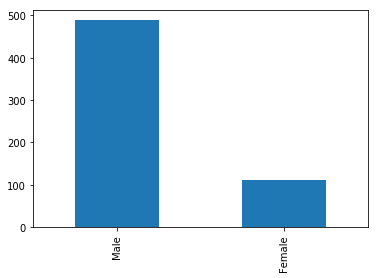

In [9]:
gend = df['Gender'].value_counts()
print(gend)
gend.plot(kind="bar")

### 65% applicants are married

Yes    398
No     213
Name: Married, dtype: int64


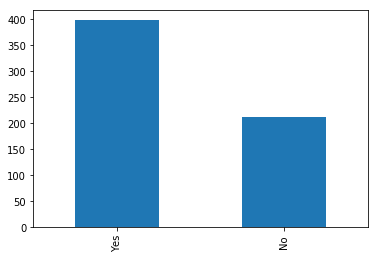

In [10]:
marr = df['Married'].value_counts()
print(marr)
marr.plot(kind="bar")

### 78% applicants are Graduate

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


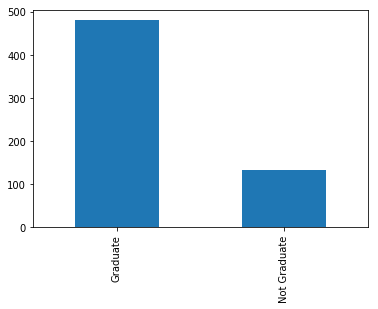

In [11]:
edu = df['Education'].value_counts()
print(edu)
edu.plot(kind="bar")

### Only 14% applicants are self employed

No     500
Yes     82
Name: Self_Employed, dtype: int64


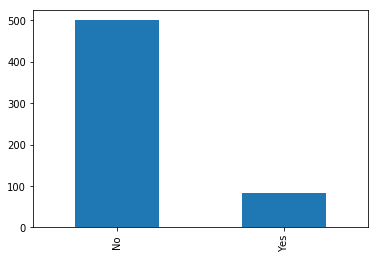

In [12]:
self_emp = df['Self_Employed'].value_counts()
print(self_emp)
self_emp.plot(kind="bar")

### 57.6% applicants don't have dependents

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


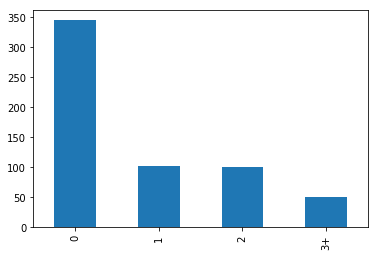

In [14]:
dep = df['Dependents'].value_counts()
print(dep)
dep.plot(kind="bar")

## Distribution Analysis
### ApplicantIncome has many outliers (mean=5403.459283) and it's positively skewed distribution

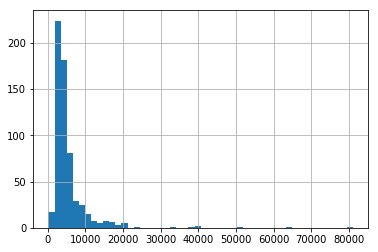

In [15]:
df['ApplicantIncome'].hist(bins=50)

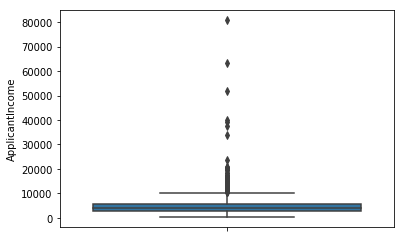

In [52]:
sb.boxplot(df['ApplicantIncome'], orient="v") # there are some outliers clearly

### Most of the outliers are caused by Graduate applicants

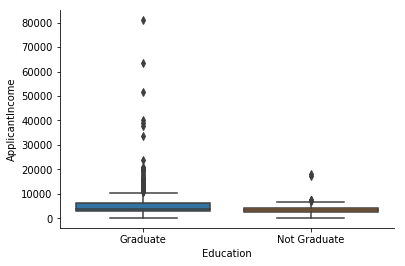

In [51]:
sb.boxplot(x='Education', y='ApplicantIncome', data=df) # there are some outliers in this variable too
sb.despine()

## graduate applicants who are self employed are having the maximum ApplicantIncome than others

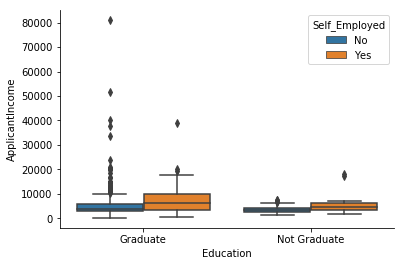

In [48]:
sb.boxplot(x='Education', y='ApplicantIncome', hue='Self_Employed', data=df)
sb.despine()

### LoanAmount is also a normal distribution having outliers (mean=146.412162) and it's a positive skewed distribution

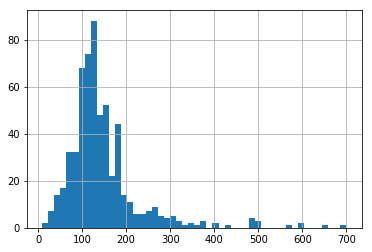

In [18]:
df['LoanAmount'].hist(bins=50)

### there are many outliers present

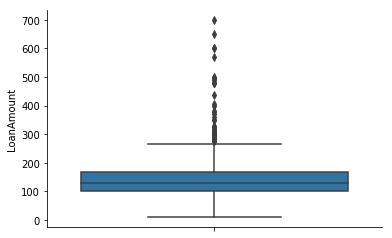

In [41]:
sb.boxplot(df['LoanAmount'], orient="v") # there are some outliers in this variable too
sb.despine()

## Categorical variable analysis

In [31]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())['Loan_Status']

## This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history

Text(0.5, 1.0, 'Probability of getting loan by credit history')

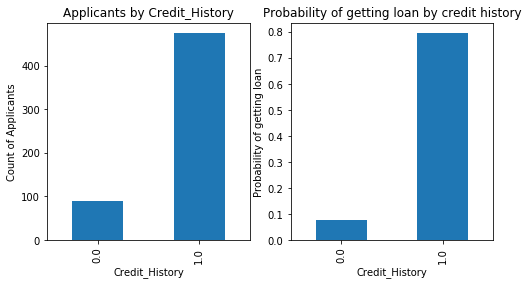

In [22]:
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
temp1.plot(kind='bar')
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History")  
ax2 = fig.add_subplot(122) 
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history") 

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


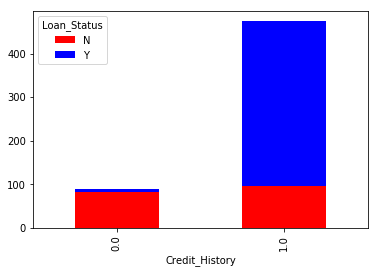

In [23]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### There is no clear bias among male and female candidates

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


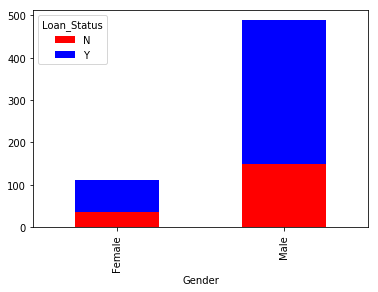

In [32]:
temp4 = pd.crosstab(df['Gender'], df['Loan_Status']) 
print(temp4)
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Graduate applicants are more likely to get loans than non Graduates

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


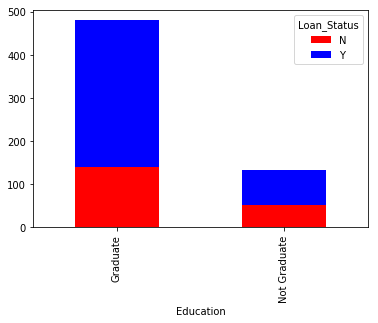

In [36]:
temp5 = pd.crosstab(df['Education'], df['Loan_Status']) 
print(temp5)
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Male applicants who have 1 Credit History are most likely to get the loan

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


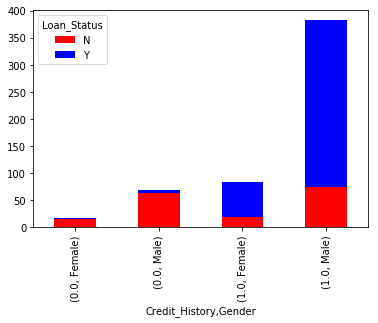

In [37]:
temp6 = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status']) 
print(temp6)
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Graduate applicants having 1 credit history are most likely to get the loan

Loan_Status                   N    Y
Credit_History Education            
0.0            Graduate      57    6
               Not Graduate  25    1
1.0            Graduate      73  307
               Not Graduate  24   71


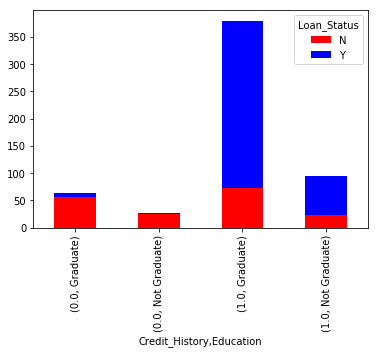

In [38]:
temp7 = pd.crosstab([df['Credit_History'], df['Education']], df['Loan_Status'])
print(temp7)
temp7.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Now let's make our predictions based on this. Got score 0.652777777777778

In [25]:
test_data = pd.read_csv('./test.csv')

import random
preds = [['Loan_ID', 'Loan_Status']]
for i in range(test_data.shape[0]):
    r = random.random()
    tf0 = temp4['N'][0][0]/(temp4['N'][0][0] + temp4['Y'][0][0])
    tm0 = temp4['N'][0][1]/(temp4['N'][0][1] + temp4['Y'][0][1])
    tf1 = temp4['N'][1][0]/(temp4['N'][1][0] + temp4['Y'][1][0])
    tm1 = temp4['N'][1][1]/(temp4['N'][1][1] + temp4['Y'][1][1])
    
    if test_data['Gender'][i]=='Female' and test_data['Credit_History'][i]==0:
        if r>=tf0:
            preds.append([test_data['Loan_ID'][i], 'Y'])
        else:
            preds.append([test_data['Loan_ID'][i], 'N'])
    elif test_data['Gender'][i]=='Female' and test_data['Credit_History'][i]==1:
        if r>=tf1:
            preds.append([test_data['Loan_ID'][i], 'Y'])
        else:
            preds.append([test_data['Loan_ID'][i], 'N'])
    elif test_data['Gender'][i]=='Male' and test_data['Credit_History'][i]==0:
        if r>=tm0:
            preds.append([test_data['Loan_ID'][i], 'Y'])
        else:
            preds.append([test_data['Loan_ID'][i], 'N'])
    elif test_data['Gender'][i]=='Male' and test_data['Credit_History'][i]==1:
        if r>=tm1:
            preds.append([test_data['Loan_ID'][i], 'Y'])
        else:
            preds.append([test_data['Loan_ID'][i], 'N'])
    else:
        preds.append([test_data['Loan_ID'][i], 'N'])
print(len(preds))

368


In [26]:
test_data.shape[0]

367

In [27]:
preds = pd.DataFrame(preds)

In [28]:
preds.to_csv('preds.csv', index=None, header=None)